Visualizing 49ers Defense

    Scott Elmore
    DSC465 Final

In [94]:
import pandas as pd
import plotnine
from plotnine import *

In [95]:
#read from an excel file created by Tableau 
#that keeps only dimensions related to Defensive stats
df = pd.read_excel('Def_stats.xlsx')

In [96]:
#all rows need to be filled in with the team name and game id
df[['Defteam','Game Id']] = df[['Defteam','Game Id']].fillna(method='ffill')
df[['Def Penalty Yards']] = df[['Def Penalty Yards']].fillna(value = 0)

In [97]:
# df.head()

In [98]:
#penalty yards and WP were deemed unnecessary variables for the plot
df = df.drop('WP At Play', axis = 1)
df = df.drop('Def Penalty Yards', axis = 1)

In [99]:
# df_all_game = df.groupby(['Defteam', 'Game Id']).agg(
#     {'Qb Hit' : 'sum', 'Def WPA' : 'sum',
#     'Def EPA' : 'sum', 'Interception' : 'sum',
#     'Sack' : 'sum', 'Fumble Forced' : 'sum',
#     'Tackled For Loss' : 'sum', 'Avg. Yards Gained' : 'sum',
#     'Avg. Third Down Conversion Rate' : 'mean'})

In [100]:
#when groupind the rows into the team, aggregate all measures with sum
#except third down conversion, which is an average
df_all_team = df.groupby(['Defteam']).agg(
    {'Qb Hit' : 'sum', 'Def WPA' : 'sum',
    'Def EPA' : 'sum', 'Interception' : 'sum',
    'Sack' : 'sum', 'Fumble Forced' : 'sum',
    'Tackled For Loss' : 'sum', 'Avg. Yards Gained' : 'sum',
    'Avg. Third Down Conversion Rate' : 'mean' })

In [101]:
df_all_team.head()

,Qb Hit,Def WPA,Def EPA,Interception,Sack,Fumble Forced,Tackled For Loss,Avg. Yards Gained,Avg. Third Down Conversion Rate
Defteam,,,,,,,,,
ARI,87,-5.355118,-130.642593,7,40,19,62,6432,0.467290
ATL,65,-4.718360,-86.104803,12,28,19,47,5697,0.398964
BAL,108,0.736041,54.180025,13,37,15,37,4815,0.371134
BUF,89,1.335021,78.598368,14,44,15,49,4780,0.358491
CAR,103,-3.024173,-89.159757,14,53,9,30,5996,0.398964


In [102]:
#shorten some of the variable names
df_all_team = df_all_team.rename(columns={'Avg. Third Down Conversion Rate' : '3rd Down Conversion Rate', 
                                          'Avg. Yards Gained' : 'Yards Allowed',
                                          'Def EPA' : 'Defensive EPA',
                                          'Def WPA' : 'Defensive WPA',
                                          'Interception' : 'Interceptions',
                                          'Fumble Forced' : 'Forced Fumbles',
                                          'Tackled For Loss' : 'Tackles For Loss',
                                          'Sack' : 'Sacks',
                                          })

In [103]:
#df_all_team.info()

In [104]:
# df_all_game = df_all_game.reset_index(level=[0,1])

In [105]:
# df_all_game_melt = pd.melt(df_all_game, id_vars=['Defteam','Game Id'])

In [106]:
#melt data so it can be better visualized with boxplots
df_all_team_melt = pd.melt(df_all_team.reset_index(), id_vars=['Defteam'], var_name='Defensive Stat')

In [107]:
# df_all_game_melt['49ers'] = df_all_game_melt['Defteam'] == 'SF'

In [108]:
#create a variable to determine if team is the 49ers
df_all_team_melt['49ers'] = df_all_team_melt['Defteam'] == 'SF'

In [109]:
df_all_team_melt.rename(columns = {'Defensive Stat' : 'Defensive Success Metrics'}, inplace=True)

In [110]:
#df_all_team_melt.info()

In [111]:
# ggplot(df_all_game_melt, aes('variable', 'value')) + \
# geom_violin() + geom_sina() + \
# geom_point(test, aes('variable', 'value'), color='red') + \
# facet_wrap('variable', scales = 'free')
# 

In [112]:
# ggplot(df_all_game_melt, aes('variable', 'value', color='49ers')) + \
# geom_boxplot(aes(color='49ers')) + geom_jitter(aes(color='49ers'), width = .1) + \
# facet_wrap('variable', scales = 'free')
# 

In [113]:
# ggplot(df_all_game_melt, aes('variable', 'value')) + \
# geom_violin() + geom_sina() + \
# facet_wrap('variable', scales = 'free')

In [114]:
#bigger plot size
plotnine.options.figure_size = (18,12)

In [115]:
#violin + sina plots
fig1 = (ggplot(df_all_team_melt, aes('Defensive Success Metrics', 'value')) + \
geom_violin() + geom_sina(aes(color='49ers'), position= position_identity()) + \
scale_color_manual(values = ('#999999', '#ff0000')) + \
theme(axis_text_x = element_blank(), panel_spacing = .5,
      title = element_text(family='DejaVu Sans', face = 'bold', size = (15))) +\
ggtitle('49ers in Relation to NFL') +\
facet_wrap('Defensive Success Metrics', scales = 'free', ncol = 3))

In [116]:
#boxplot + jitter
fig2 = (ggplot(df_all_team_melt, aes('Defensive Success Metrics', 'value')) + \
geom_boxplot() + geom_jitter(aes(color='49ers', size='49ers'), width = .1) + \
scale_color_manual(values = ('#999999', '#ff0000')) + \
theme(axis_text_x = element_blank(), panel_spacing = .5, legend_position = 'none', axis_title_y = element_blank(),
      strip_text = element_text(size = 12), title = element_text(family='DejaVu Sans', face = 'bold', size = (18))) +\
ggtitle('49ers Defense in Relation to NFL') +\
facet_wrap('Defensive Success Metrics', scales = 'free', ncol = 3))

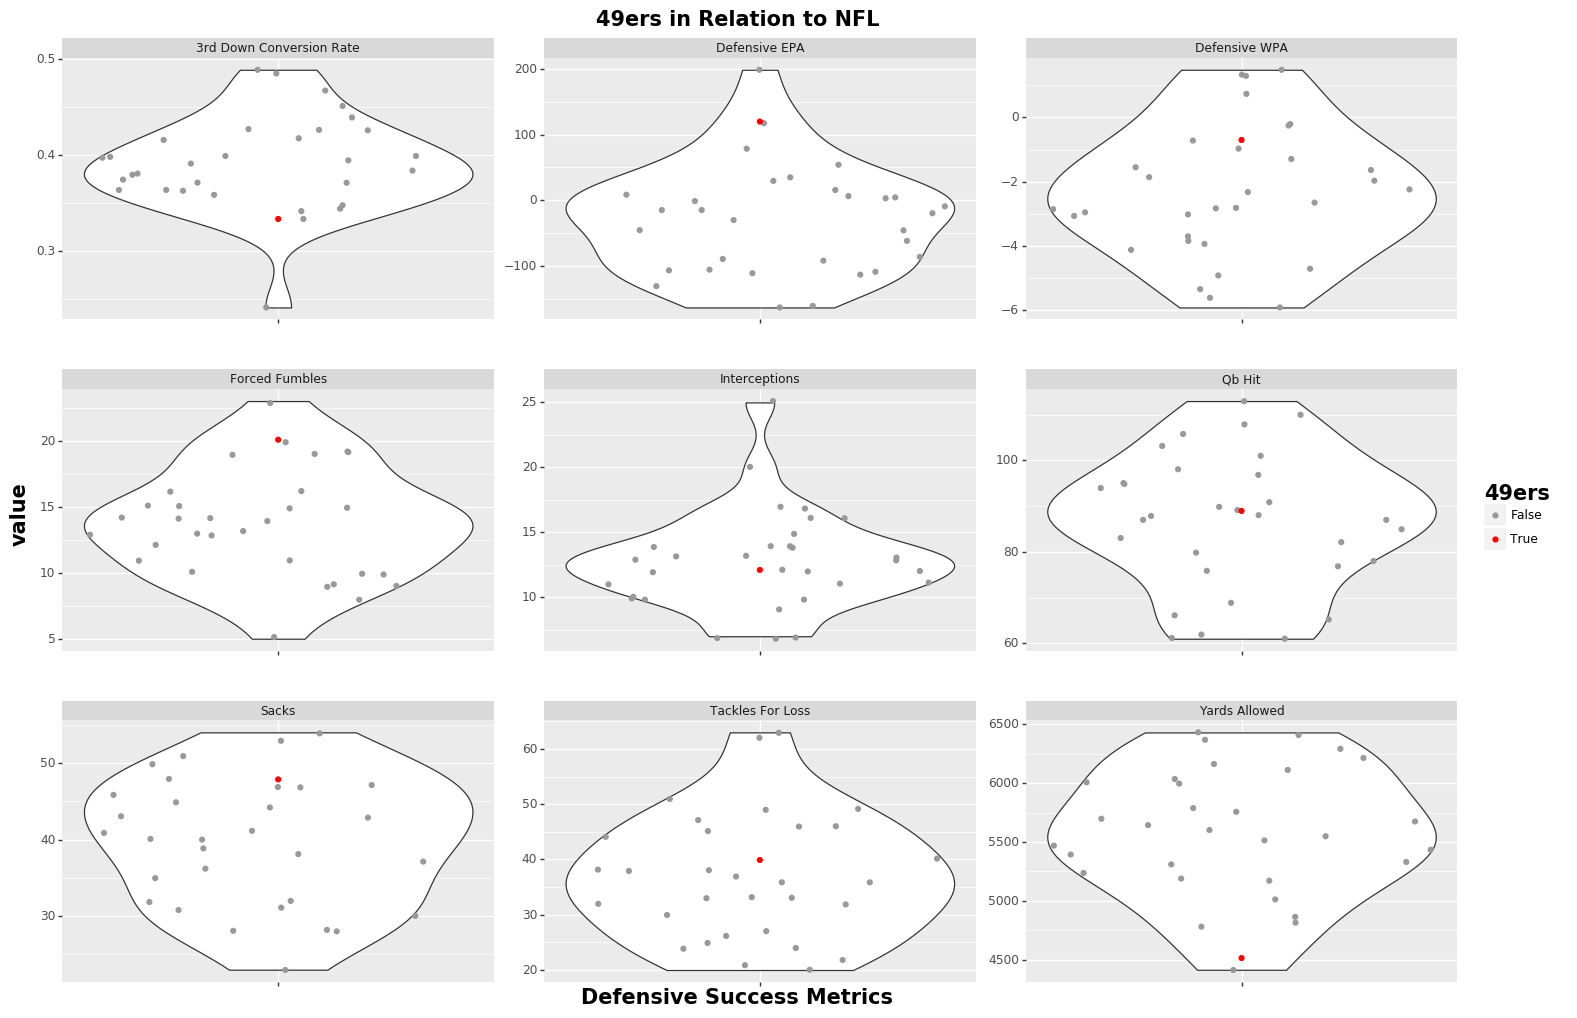

<ggplot: (105546421084)>


In [117]:
print(fig1)

C:\Users\Scott\Anaconda3\lib\site-packages\plotnine\scales\scale_size.py:50: PlotnineWarning: Using alpha for a discrete variable is not advised.
  PlotnineWarning


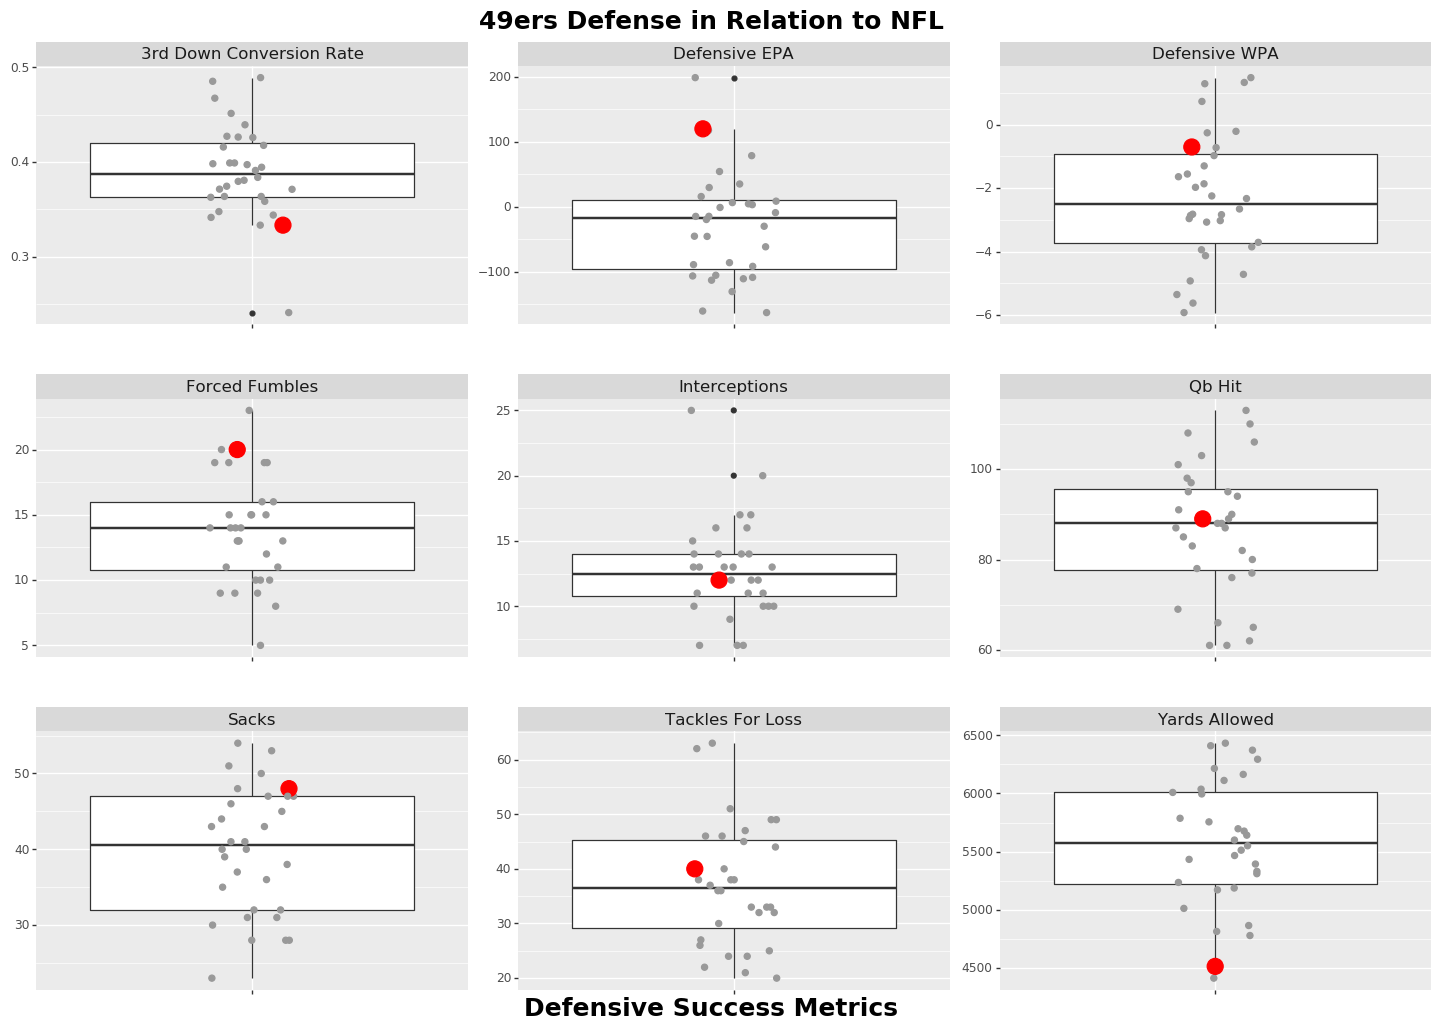

<ggplot: (-9223371931305893856)>


In [118]:
print(fig2)

In [119]:
fig2.save(filename = '49ers_Boxplots')



C:\Users\Scott\Anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 18 x 12 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\Scott\Anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: 49ers_Boxplots
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\Scott\Anaconda3\lib\site-packages\plotnine\scales\scale_size.py:50: PlotnineWarning: Using alpha for a discrete variable is not advised.
  PlotnineWarning
